<a href="https://www.kaggle.com/code/ebugasadunajohn/weather-prediction-model?scriptVersionId=183674099" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Building a Weather Prediction Model
**We will learn how to build a simple weather prediction model with the Minimum Temp and the Maximum Temperature**

In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

# to visualize plots in jupyter notebook
%matplotlib inline

In [2]:
# reading the dataset from a csv file
data = pd.read_csv('Weather_Dataset.csv')

In [3]:
# check the first 5 records of the data
data.head()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
0,8.0,24.3,0.0,3.4,6.3,NW,30.0,SW,NW,6.0,...,29,1019.7,1015.0,7,7,14.4,23.6,No,3.6,Yes
1,14.0,26.9,3.6,4.4,9.7,ENE,39.0,E,W,4.0,...,36,1012.4,1008.4,5,3,17.5,25.7,Yes,3.6,Yes
2,13.7,23.4,3.6,5.8,3.3,NW,85.0,N,NNE,6.0,...,69,1009.5,1007.2,8,7,15.4,20.2,Yes,39.8,Yes
3,13.3,15.5,39.8,7.2,9.1,NW,54.0,WNW,W,30.0,...,56,1005.5,1007.0,2,7,13.5,14.1,Yes,2.8,Yes
4,7.6,16.1,2.8,5.6,10.6,SSE,50.0,SSE,ESE,20.0,...,49,1018.3,1018.5,7,7,11.1,15.4,Yes,0.0,No


In [4]:
#check the last 5 records
data.tail()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,...,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RISK_MM,RainTomorrow
361,9.0,30.7,0.0,7.6,12.1,NNW,76.0,SSE,NW,7.0,...,15,1016.1,1010.8,1,3,20.4,30.0,No,0.0,No
362,7.1,28.4,0.0,11.6,12.7,N,48.0,NNW,NNW,2.0,...,22,1020.0,1016.9,0,1,17.2,28.2,No,0.0,No
363,12.5,19.9,0.0,8.4,5.3,ESE,43.0,ENE,ENE,11.0,...,47,1024.0,1022.8,3,2,14.5,18.3,No,0.0,No
364,12.5,26.9,0.0,5.0,7.1,NW,46.0,SSW,WNW,6.0,...,39,1021.0,1016.2,6,7,15.8,25.9,No,0.0,No
365,12.3,30.2,0.0,6.0,12.6,NW,78.0,NW,WNW,31.0,...,13,1009.6,1009.2,1,1,23.8,28.6,No,0.0,No


In [5]:
# to check more information on the datatype and others
data.info()

<class 'pandas.core.frame.DataFrame'>

RangeIndex: 366 entries, 0 to 365

Data columns (total 22 columns):

 #   Column         Non-Null Count  Dtype  

---  ------         --------------  -----  

 0   MinTemp        366 non-null    float64

 1   MaxTemp        366 non-null    float64

 2   Rainfall       366 non-null    float64

 3   Evaporation    366 non-null    float64

 4   Sunshine       363 non-null    float64

 5   WindGustDir    363 non-null    object 

 6   WindGustSpeed  364 non-null    float64

 7   WindDir9am     335 non-null    object 

 8   WindDir3pm     365 non-null    object 

 9   WindSpeed9am   359 non-null    float64

 10  WindSpeed3pm   366 non-null    int64  

 11  Humidity9am    366 non-null    int64  

 12  Humidity3pm    366 non-null    int64  

 13  Pressure9am    366 non-null    float64

 14  Pressure3pm    366 non-null    float64

 15  Cloud9am       366 non-null    int64  

 16  Cloud3pm       366 non-null    int64  

 17  Temp9am        366 non-null    f

In [6]:
# getting more descriptions from the data
data.describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RISK_MM
count,366.000000,366.000000,366.000000,366.000000,363.000000,364.000000,359.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,7.265574,20.550273,1.428415,4.521858,7.909366,39.840659,9.651811,17.986339,72.035519,44.519126,1019.709016,1016.810383,3.890710,4.024590,12.358470,19.230874,1.428415
std,6.025800,6.690516,4.225800,2.669383,3.481517,13.059807,7.951929,8.856997,13.137058,16.850947,6.686212,6.469422,2.956131,2.666268,5.630832,6.640346,4.225800
min,-5.300000,7.600000,0.000000,0.200000,0.000000,13.000000,0.000000,0.000000,36.000000,13.000000,996.500000,996.800000,0.000000,0.000000,0.100000,5.100000,0.000000
25%,2.300000,15.025000,0.000000,2.200000,5.950000,31.000000,6.000000,11.000000,64.000000,32.250000,1015.350000,1012.800000,1.000000,1.000000,7.625000,14.150000,0.000000
50%,7.450000,19.650000,0.000000,4.200000,8.600000,39.000000,7.000000,17.000000,72.000000,43.000000,1020.150000,1017.400000,3.500000,4.000000,12.550000,18.550000,0.000000
75%,12.500000,25.500000,0.200000,6.400000,10.500000,46.000000,13.000000,24.000000,81.000000,55.000000,1024.475000,1021.475000,7.000000,7.000000,17.000000,24.000000,0.200000
max,20.900000,35.800000,39.800000,13.800000,13.600000,98.000000,41.000000,52.000000,99.000000,96.000000,1035.700000,1033.200000,8.000000,8.000000,24.700000,34.500000,39.800000


In [7]:
# checking for null values
data.isnull().sum()

MinTemp           0
MaxTemp           0
Rainfall          0
Evaporation       0
Sunshine          3
WindGustDir       3
WindGustSpeed     2
WindDir9am       31
WindDir3pm        1
WindSpeed9am      7
WindSpeed3pm      0
Humidity9am       0
Humidity3pm       0
Pressure9am       0
Pressure3pm       0
Cloud9am          0
Cloud3pm          0
Temp9am           0
Temp3pm           0
RainToday         0
RISK_MM           0
RainTomorrow      0
dtype: int64

In [8]:
# filling in missing values with forwardfill
main_data = data.fillna(method='ffill')
main_data.isnull().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RISK_MM          0
RainTomorrow     0
dtype: int64

### Visualizing the data

Text(0.5, 1.0, 'MaxTemp against Min Temp')

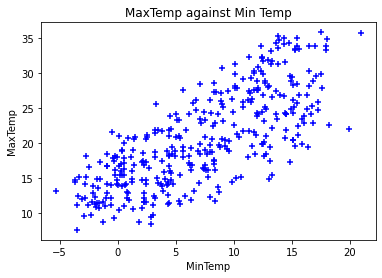

In [9]:
# using scatter plot
plt.scatter(main_data['MinTemp'],main_data['MaxTemp'], marker='+', color='b')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.title('MaxTemp against Min Temp')

Text(0.5, 1.0, 'MaxTemp against Min Temp')

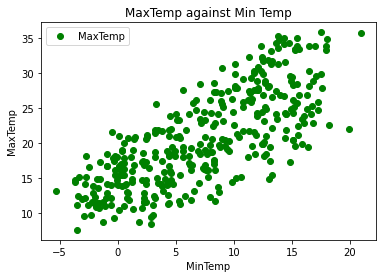

In [10]:
# using plot
main_data.plot('MinTemp','MaxTemp', style='o', color='g')
plt.xlabel('MinTemp')
plt.ylabel('MaxTemp')
plt.title('MaxTemp against Min Temp')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).

  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='MaxTemp', ylabel='Density'>

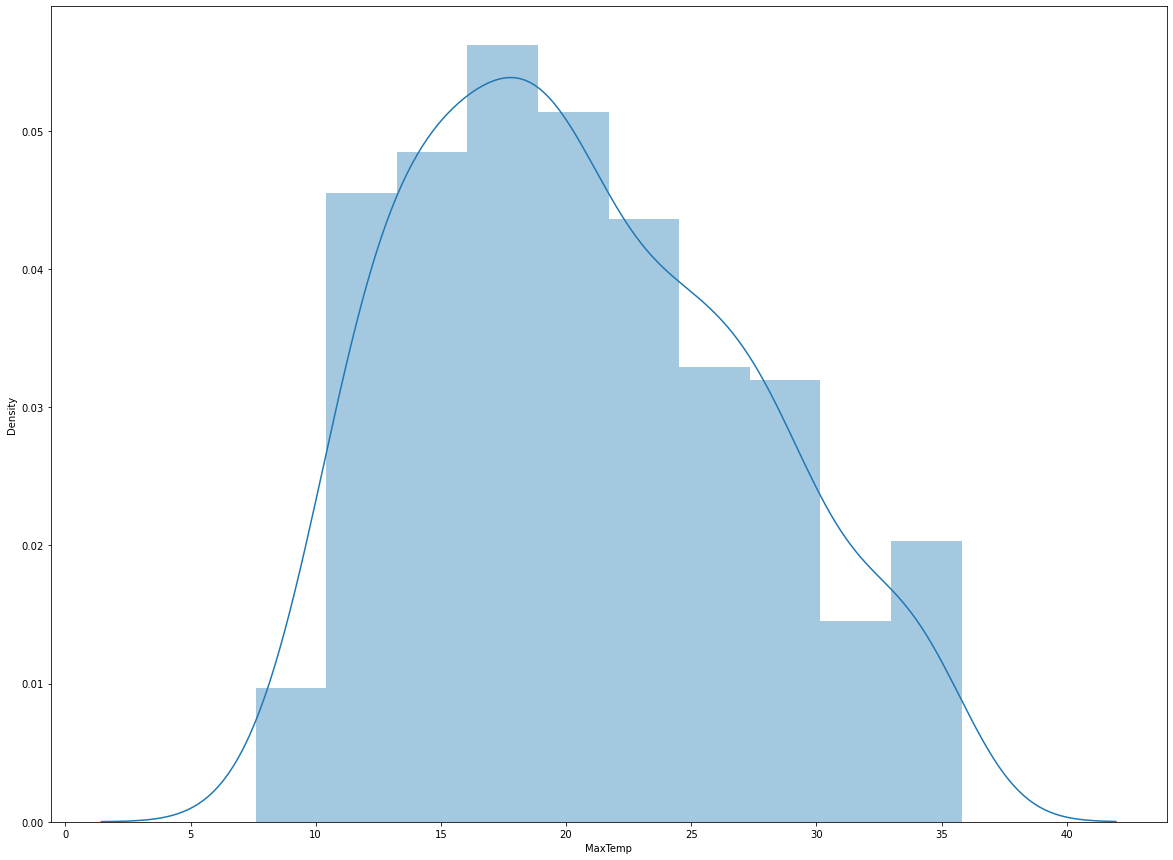

In [11]:
# using distplot in seaborn
plt.figure(figsize=(20,15))
sns.distplot(main_data.MaxTemp)

### Training the Model

In [12]:
# Assining X and y value
X = main_data.MinTemp.values.reshape(-1,1) # reshaping to a 2d array
y = main_data.MaxTemp.values.reshape(-1,1) # reshaping to a 2d array

In [13]:
# spliting to test and train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=10) 

In [14]:
X_test

array([[-0.1],
       [13.6],
       [12.7],
       [ 6.1],
       [12.9],
       [ 9.2],
       [ 5.9],
       [13.9],
       [17.2],
       [11.6],
       [10.2],
       [ 9.6],
       [ 0.9],
       [ 8.9],
       [ 8.9],
       [14.3],
       [ 3.2],
       [ 8.4],
       [14.3],
       [ 1.3],
       [ 9. ],
       [ 4.4],
       [ 1.3],
       [14. ],
       [ 5.6],
       [ 7.5],
       [ 4.4],
       [ 5.4],
       [ 8.7],
       [ 4.6],
       [ 7. ],
       [ 0.4],
       [ 2.1],
       [ 8.2],
       [ 1.1],
       [-0.6],
       [ 3.2],
       [ 3. ],
       [ 8.6],
       [ 4.4],
       [10.1],
       [11.9],
       [12.6],
       [12.4],
       [ 3.1],
       [ 6.5],
       [12.1],
       [ 8.3],
       [14.8],
       [-0.9],
       [13.3],
       [ 7.1],
       [15.1],
       [ 0. ],
       [12.9],
       [-0.2],
       [ 1.8],
       [-1.8],
       [16.7],
       [ 2.2],
       [ 3.2],
       [15.4],
       [ 2.9],
       [13.1],
       [14.5],
       [17.9],
       [ 7

In [15]:
X_train

array([[ 9.4],
       [-2.2],
       [17.2],
       [ 9.1],
       [13.6],
       [15.9],
       [10.1],
       [12.3],
       [ 3.4],
       [ 5. ],
       [-1.6],
       [-1.6],
       [ 2.4],
       [12.5],
       [ 4.5],
       [16.3],
       [ 4.1],
       [-0.1],
       [15.6],
       [12.1],
       [ 6.2],
       [-1.9],
       [ 2.3],
       [12.6],
       [ 6.3],
       [13.8],
       [16.4],
       [-2. ],
       [10.8],
       [15.1],
       [10.8],
       [12.6],
       [ 4.9],
       [14.4],
       [15.4],
       [-1. ],
       [ 9. ],
       [ 8.3],
       [ 4.4],
       [15. ],
       [-0.6],
       [ 4.5],
       [ 0.5],
       [ 6.1],
       [13.3],
       [ 3. ],
       [ 4.8],
       [16.5],
       [ 2.1],
       [ 8. ],
       [14.8],
       [ 6.7],
       [ 7.5],
       [ 0.5],
       [ 9.8],
       [ 6.1],
       [ 4.4],
       [ 0.5],
       [ 9.9],
       [ 0.4],
       [ 2.5],
       [-1.3],
       [15.9],
       [12.1],
       [ 0.2],
       [ 1.4],
       [ 2

In [16]:
# no need to check for y, it is going to be very similar to the X
Model = LinearRegression()

In [17]:
Model.fit(X_train, y_train)

LinearRegression()

In [18]:
# checking intercept
Model.intercept_

array([14.5052898])

In [19]:
# checking coefficient 
Model.coef_

array([[0.82202253]])

In [20]:
MaxTemp_Predict = Model.predict(X_test)

In [21]:
MaxTemp_Predict

array([[14.42308755],
       [25.68479621],
       [24.94497593],
       [19.51962723],
       [25.10938043],
       [22.06789707],
       [19.35522273],
       [25.93140296],
       [28.64407731],
       [24.04075115],
       [22.8899196 ],
       [22.39670609],
       [15.24511008],
       [21.82129032],
       [21.82129032],
       [26.26021198],
       [17.1357619 ],
       [21.41027905],
       [26.26021198],
       [15.57391909],
       [21.90349257],
       [18.12218893],
       [15.57391909],
       [26.01360522],
       [19.10861597],
       [20.67045877],
       [18.12218893],
       [18.94421146],
       [21.65688581],
       [18.28659344],
       [20.25944751],
       [14.83409881],
       [16.23153711],
       [21.24587454],
       [15.40951458],
       [14.01207628],
       [17.1357619 ],
       [16.97135739],
       [21.57468356],
       [18.12218893],
       [22.80771735],
       [24.28735791],
       [24.86277368],
       [24.69836917],
       [17.05355964],
       [19

In [22]:
# inserting the actual MaxTemp and the predicted MaxTemp into a dataframe

dataframe = pd.DataFrame({
    'Actual Temp': y_test.flatten(),
    'Predicted Temp': MaxTemp_Predict.flatten()
})

In [23]:
dataframe

,Actual Temp,Predicted Temp
0,18.0,14.423088
1,27.4,25.684796
2,25.1,24.944976
3,18.2,19.519627
4,31.8,25.109380
...,...,...
105,16.8,20.670459
106,29.9,24.780571
107,17.4,17.628975
108,27.6,19.108616


### Visualizing the Actual and Predicted Value

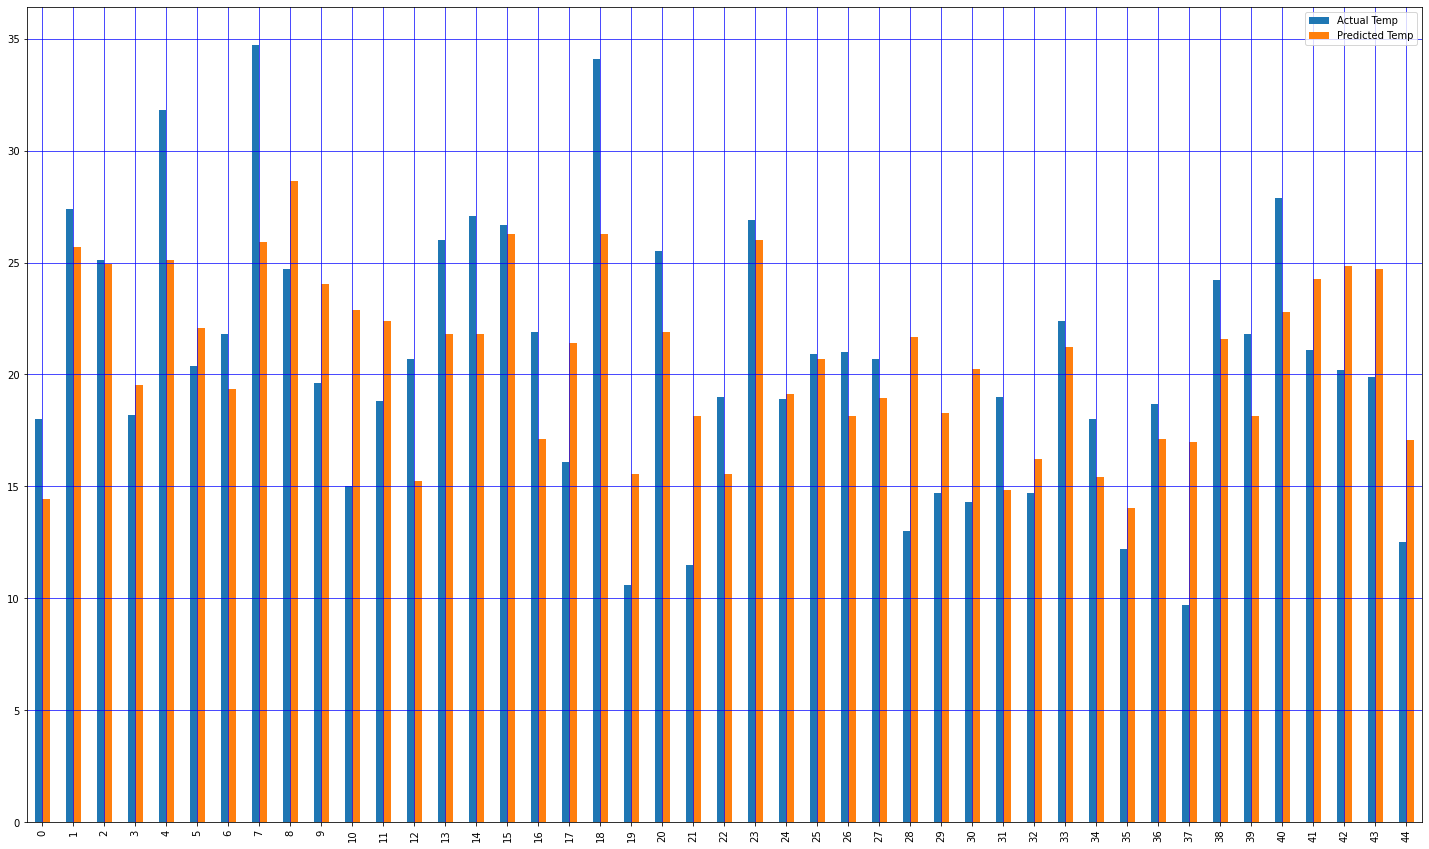

In [24]:
dataframe.head(45).plot(kind='bar', figsize=(25,15))
plt.grid(which='major', linestyle='-', linewidth='0.7', color='blue')
plt.grid(which='minor', linestyle=':', linewidth='0.7', color='green')

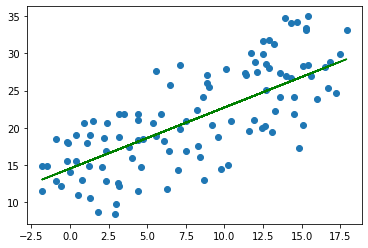

In [25]:
plt.scatter(X_test, y_test)
plt.plot(X_test, MaxTemp_Predict, 'g')

# Model Evaluation 
### Checking Mean Absolute Error, Mean Squared Error and Root Mean Squared Error

In [26]:
from sklearn import metrics

In [27]:
# Mean Absolute Error
metrics.mean_absolute_error(y_test, MaxTemp_Predict)

3.7349223485723537

In [28]:
# Mean Squared Error
metrics.mean_squared_error(y_test, MaxTemp_Predict)

19.934177819665127

In [29]:
# Root Mean Squared Error
np.sqrt(metrics.mean_squared_error(y_test, MaxTemp_Predict))

4.464770746596641

In [ ]:
# this data was downloaded from a kaggle under (Vaibhav Mehta account)